# Set up Python with standard data science and visualization libraries

In [1]:
# Numpy uses lists to do basic math and slice and index data
# Pandas uses a data structure called a Dataframe
# (which is similar to Excel with rows and columns)

import numpy as np
import pandas as pd
import pylab as pl
import statsmodels.api as sm
import seaborn as sns
sns.set_style("darkgrid")

# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
# this allows plots to appear directly in the notebook
%matplotlib inline

# Read in the Private-Non-Profit-Retention Rates data file

In [2]:
# Check the current working directory to where files are located
import os
os.getcwd()

'/Users/michaelurmeneta/Dropbox/PythonCode/Private_NonProfit_Retention_Rates'

In [4]:
PrivateNonProfit = pd.read_excel('DataFile/Private-Non-Profit-Retention Rates.xlsx')

In [5]:
PrivateNonProfit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Rank                                               416 non-null float64
 Institution                                       417 non-null object
 Retention Rate Fall 2016                          417 non-null float64
Number of students in Fall 2015 entering cohort    417 non-null float64
Percentage receiving Pell Grants                   417 non-null float64
Acceptance Rate                                    417 non-null float64
dtypes: float64(5), object(1)
memory usage: 19.7+ KB


In [6]:
PrivateNonProfit.head()

,Rank,Institution,Retention Rate Fall 2016,Number of students in Fall 2015 entering cohort,Percentage receiving Pell Grants,Acceptance Rate
0,1.0,Wheaton College (Ill.),0.954,606.0,0.205,0.692
1,2.0,Kettering U.,0.952,364.0,0.220,0.716
2,3.0,Rose-Hulman Institute of Technology,0.939,582.0,0.143,0.588
3,4.0,Centre College,0.933,385.0,0.153,0.716
4,5.0,Providence College,0.932,1030.0,0.135,0.631


In [7]:
PrivateNonProfit.describe()

,Rank,Retention Rate Fall 2016,Number of students in Fall 2015 entering cohort,Percentage receiving Pell Grants,Acceptance Rate
count,416.000000,417.000000,417.000000,417.000000,417.000000
mean,208.485577,0.781293,650.633094,0.341405,0.719969
std,120.229859,0.096080,446.803145,0.146207,0.118899
min,1.000000,0.397000,300.000000,0.077000,0.501000
25%,104.750000,0.745000,400.000000,0.239000,0.625000
50%,208.500000,0.798000,511.000000,0.311000,0.716000
75%,312.250000,0.848000,706.000000,0.413000,0.796000
max,416.000000,0.954000,3622.000000,0.904000,1.000000


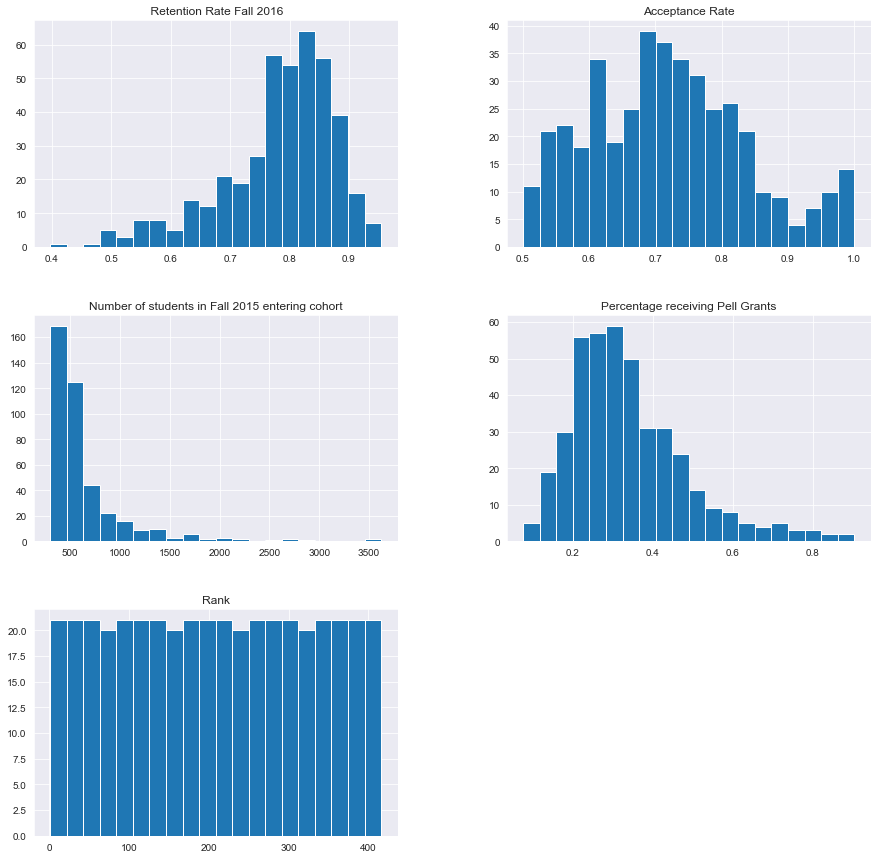

In [8]:
# Explore dataset using histograms of all values
PrivateNonProfit.hist(bins=20, figsize=(15, 15))
pl.show()

/Users/michaelurmeneta/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/michaelurmeneta/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


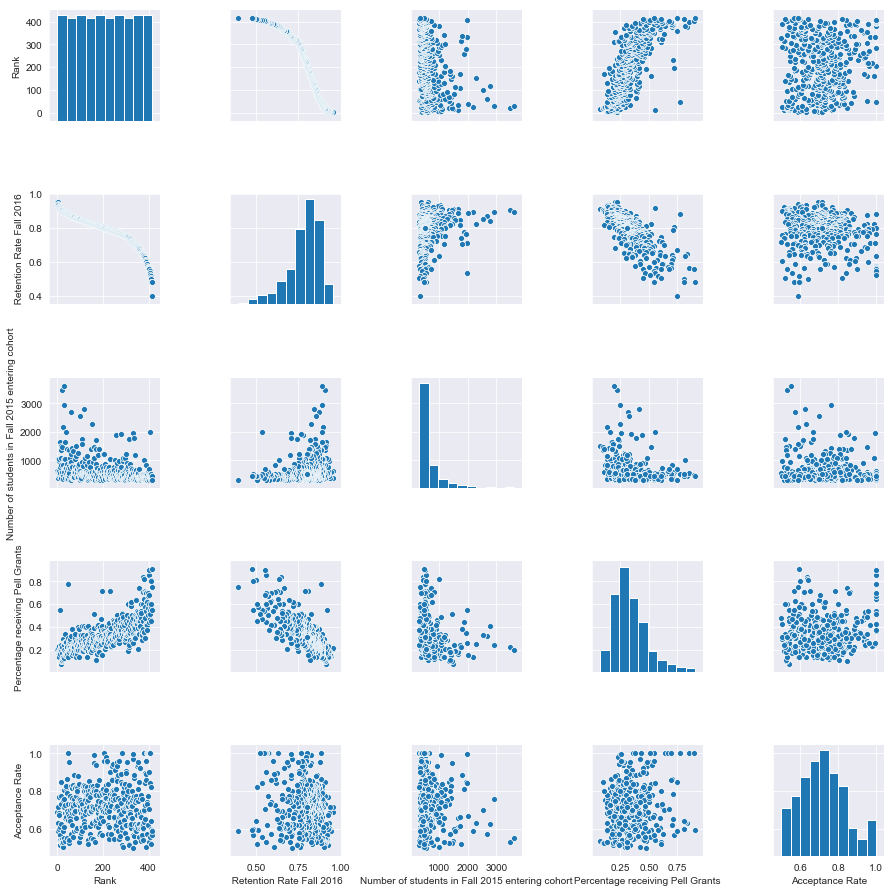

In [9]:
sns.pairplot(data=PrivateNonProfit, height = 2.5)

/Users/michaelurmeneta/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


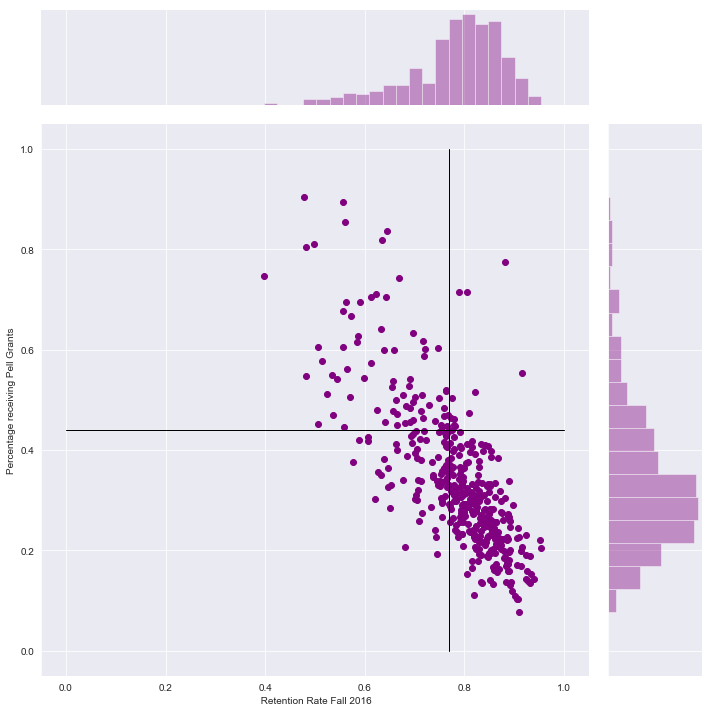

In [10]:
grid = sns.jointplot(x=' Retention Rate Fall 2016',
              y='Percentage receiving Pell Grants',
              data=PrivateNonProfit, color='purple', height=10)
# Create refernce line plots
# NYIT is at 77% retention
grid.ax_joint.plot([.77,.77], [1,0], '-', linewidth = 1, color = 'k')
# NYIT is at 44% Pell
grid.ax_joint.plot([1,0], [.44,.44], '-', linewidth = 1, color = 'k')

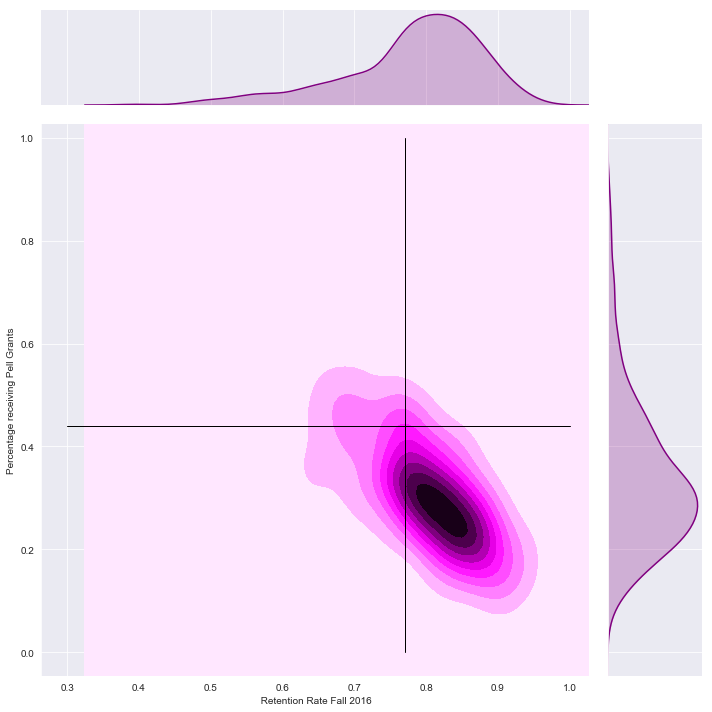

In [11]:
grid = sns.jointplot(x=' Retention Rate Fall 2016',
              y='Percentage receiving Pell Grants',
              data=PrivateNonProfit, kind = 'kde',color='purple', height=10)
# Create refernce line plots
# NYIT is at 77% retention
grid.ax_joint.plot([.77,.77], [1,0], '-', linewidth = 1, color = 'k')
# NYIT is at 44% Pell 
# Note I had to modify the end ranges
grid.ax_joint.plot([1,.3], [.44,.44], '-', linewidth = 1, color = 'k')

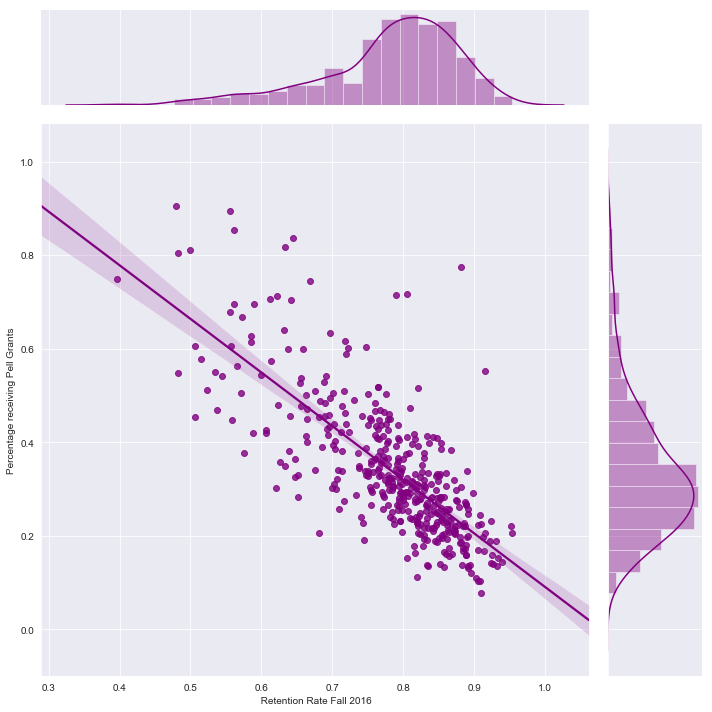

In [12]:
# This one includes a regression line
sns.jointplot(x=' Retention Rate Fall 2016',
              y='Percentage receiving Pell Grants',
              data=PrivateNonProfit, kind='reg', color='purple', height=10)

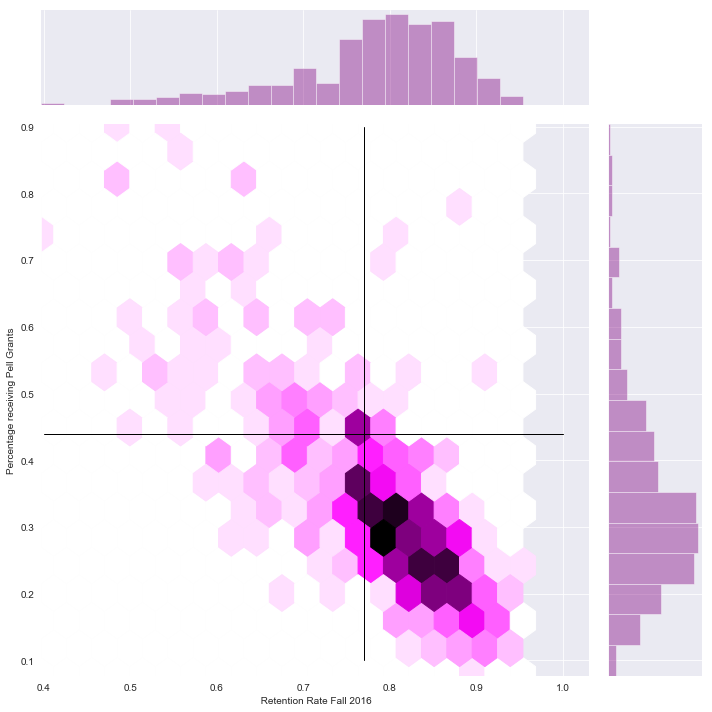

In [13]:
# This is a hex 
grid = sns.jointplot(x=' Retention Rate Fall 2016',
              y='Percentage receiving Pell Grants',
              data=PrivateNonProfit, kind = 'hex',color='purple', height=10)
# Create refernce line plots
# NYIT is at 77% retention
grid.ax_joint.plot([.77,.77], [.9,0.1], '-', linewidth = 1, color = 'k')
# NYIT is at 44% Pell
grid.ax_joint.plot([1,.4], [.44,.44], '-', linewidth = 1, color = 'k')

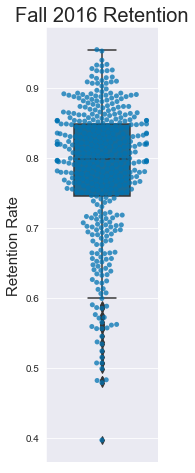

In [14]:
plt.figure(figsize=(2,8))
bplot = sns.boxplot(y=' Retention Rate Fall 2016',
                    data=PrivateNonProfit,
                    width=0.5,
                    palette = 'colorblind')
bplot = sns.swarmplot(y=' Retention Rate Fall 2016',
                      data=PrivateNonProfit,
 #                     color ='black',
                      alpha=0.75,
                      palette = 'colorblind'
                     )
bplot.set_title('Fall 2016 Retention',fontsize=20)
#bplot.set_xlabel('School', fontsize=15)
bplot.set_ylabel('Retention Rate', fontsize=15)
bplot.tick_params(labelsize=10)

# NYIT is at 77% retention

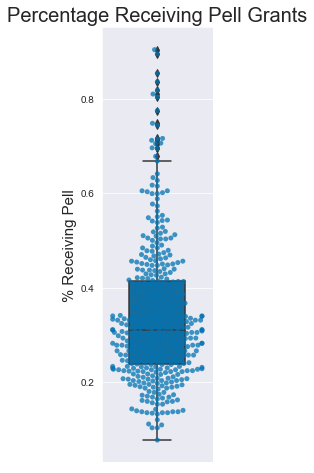

In [15]:
plt.figure(figsize=(2,8))
bplot = sns.boxplot(y='Percentage receiving Pell Grants',
                    data=PrivateNonProfit,
                    width=0.5,
                    palette = 'colorblind')
bplot = sns.swarmplot(y='Percentage receiving Pell Grants',
                      data=PrivateNonProfit,
 #                     color ='black',
                      alpha=0.75,
                      palette = 'colorblind'
                     )
bplot.set_title('Percentage Receiving Pell Grants',fontsize=20)
#bplot.set_xlabel('School', fontsize=15)
bplot.set_ylabel('% Receiving Pell', fontsize=15)
bplot.tick_params(labelsize=10)

/Users/michaelurmeneta/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/michaelurmeneta/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


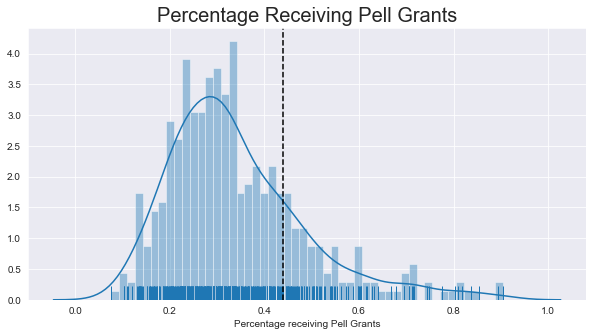

In [16]:
#Improved Histogram
plt.figure(figsize=(10,5))
sns.distplot(PrivateNonProfit['Percentage receiving Pell Grants'], bins=50, rug=True);
plt.title('Percentage Receiving Pell Grants',fontsize=20)
# NYIT is at 44% Pell
plt.axvline(.44, color="k", linestyle="--");

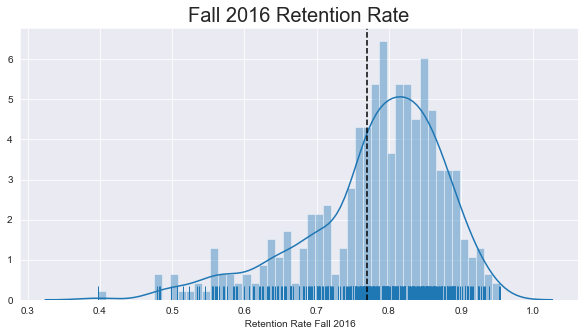

In [17]:
#Improved Histogram
plt.figure(figsize=(10,5))
sns.distplot(PrivateNonProfit[' Retention Rate Fall 2016'], bins=50, rug=True);
plt.title('Fall 2016 Retention Rate',fontsize=20)
# NYIT is at 77% retention
plt.axvline(.77, color="k", linestyle="--");